<a href="https://colab.research.google.com/github/cauarichard/crud2/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

# Força o desmonte para limpar o erro
!fusermount -u /content/drive

In [2]:
from google.colab import drive
# Monte sem o force_remount agora, para evitar o erro de 'already contain files'
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install Pillow==9.5.0 facenet-pytorch -q

In [5]:
import os
from PIL import Image
from facenet_pytorch import MTCNN
import torch

# =========================================================
# 1) BUSCA DINÂMICA DO CAMINHO (À PROVA DE ERROS)
# =========================================================
# Tentamos todas as variações comuns de montagem do Drive no Colab
possibilidades = [
    "/content/drive/MyDrive/dataset/real_fake",
    "/content/drive/My Drive/dataset/real_fake"
]

base_path = None
for p in possibilidades:
    if os.path.exists(p):
        base_path = p
        print(f"✅ Caminho base encontrado: {base_path}")
        break

if not base_path:
    print("❌ ERRO: Não achei a pasta 'real_fake'.")
    print("Diretórios disponíveis no seu Drive:")
    !ls "/content/drive/"
    raise FileNotFoundError("Verifique se o nome da pasta no Drive é exatamente 'dataset/real_fake'")

# Definindo pastas de entrada e saída
input_folder = os.path.join(base_path, "fakes_criados")
output_folder = os.path.join(base_path, "faces_fake")

# Criar pasta de saída se não existir
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"📁 Pasta de saída criada: {output_folder}")

# =========================================================
# 2) CONFIGURAÇÃO DO DETECTOR (MTCNN)
# =========================================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# margin=60 para garantir o corte amplo que você pediu
mtcnn = MTCNN(keep_all=True, device=device, margin=60, post_process=False)

# =========================================================
# 3) PROCESSAMENTO COM VERIFICAÇÃO DE ARQUIVOS
# =========================================================
if not os.path.exists(input_folder):
    print(f"❌ A subpasta '{input_folder}' não existe dentro de '{base_path}'")
    print("Conteúdo atual da pasta real_fake:")
    print(os.listdir(base_path))
else:
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if len(image_files) == 0:
        print(f"⚠️ Nenhuma imagem PNG/JPG encontrada em: {input_folder}")
    else:
        print(f"🚀 Iniciando processamento de {len(image_files)} imagens...")

        for filename in image_files:
            img_path = os.path.join(input_folder, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                save_path = os.path.join(output_folder, f"face_{filename}")

                # O MTCNN detecta e salva automaticamente
                mtcnn(img, save_path=save_path)
            except Exception as e:
                print(f"Erro ao processar {filename}: {e}")

        print(f"\n✅ CONCLUÍDO! As faces estão em: {output_folder}")

✅ Caminho base encontrado: /content/drive/MyDrive/dataset/real_fake
🚀 Iniciando processamento de 58 imagens...
Erro ao processar Cópia de artbreeder-image-2026-01-29T03_58_48.746Z.jpeg: property 'mode' of 'JpegImageFile' object has no setter
Erro ao processar Cópia de artbreeder-image-2026-01-29T03_55_58.970Z.jpeg: property 'mode' of 'JpegImageFile' object has no setter
Erro ao processar Cópia de artbreeder-image-2026-01-29T04_03_10.145Z.jpeg: property 'mode' of 'JpegImageFile' object has no setter
Erro ao processar Cópia de 809fc8766fed4696acd91431.jpeg: property 'mode' of 'JpegImageFile' object has no setter
Erro ao processar Cópia de 76ab36c46a90412883b4c25a.jpeg: property 'mode' of 'JpegImageFile' object has no setter
Erro ao processar Cópia de 175506448056442aa4cc4768888095fb.jpg: 'NoneType' object cannot be interpreted as an integer
Erro ao processar Cópia de 25f7b90eda8a4a69a821cebd3776bbe1.jpg: 'NoneType' object cannot be interpreted as an integer
Erro ao processar Cópi

📥 Carregando DINOv2...


Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


✅ Pesos 'dinov2_real_vs_fake.pth' carregados com sucesso!

🚀 Iniciando Treinamento e Avaliação...
Época 01/15 | T.Loss: 0.2138 T.Acc: 93.81% | V.Loss: 0.1295 V.Acc: 96.67%
Época 02/15 | T.Loss: 0.1435 T.Acc: 96.07% | V.Loss: 0.1103 V.Acc: 96.67%
Época 03/15 | T.Loss: 0.1209 T.Acc: 96.67% | V.Loss: 0.1014 V.Acc: 96.67%
Época 04/15 | T.Loss: 0.1053 T.Acc: 97.26% | V.Loss: 0.0947 V.Acc: 97.08%
Época 05/15 | T.Loss: 0.1004 T.Acc: 97.26% | V.Loss: 0.0891 V.Acc: 97.50%


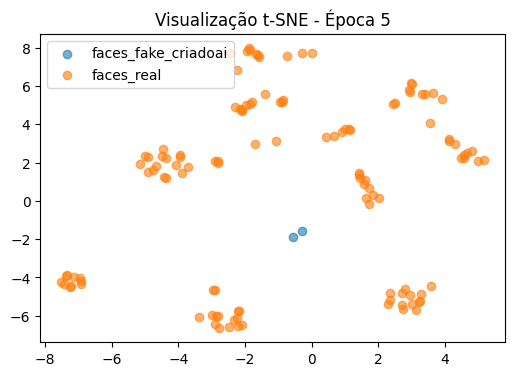

Época 06/15 | T.Loss: 0.0899 T.Acc: 97.50% | V.Loss: 0.0832 V.Acc: 97.50%
Época 07/15 | T.Loss: 0.0820 T.Acc: 97.86% | V.Loss: 0.0787 V.Acc: 98.33%
Época 08/15 | T.Loss: 0.0773 T.Acc: 97.62% | V.Loss: 0.0734 V.Acc: 98.33%
Época 09/15 | T.Loss: 0.0726 T.Acc: 98.10% | V.Loss: 0.0702 V.Acc: 98.33%
Época 10/15 | T.Loss: 0.0670 T.Acc: 98.21% | V.Loss: 0.0661 V.Acc: 98.33%


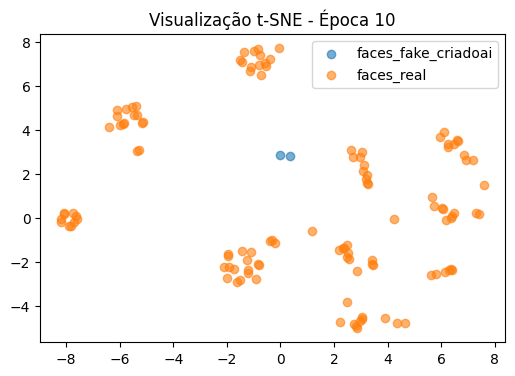

Época 11/15 | T.Loss: 0.0613 T.Acc: 98.33% | V.Loss: 0.0629 V.Acc: 98.33%
Época 12/15 | T.Loss: 0.0609 T.Acc: 98.33% | V.Loss: 0.0595 V.Acc: 98.33%
Época 13/15 | T.Loss: 0.0593 T.Acc: 97.98% | V.Loss: 0.0553 V.Acc: 98.33%
Época 14/15 | T.Loss: 0.0462 T.Acc: 98.45% | V.Loss: 0.0519 V.Acc: 98.75%
Época 15/15 | T.Loss: 0.0542 T.Acc: 98.10% | V.Loss: 0.0490 V.Acc: 98.75%


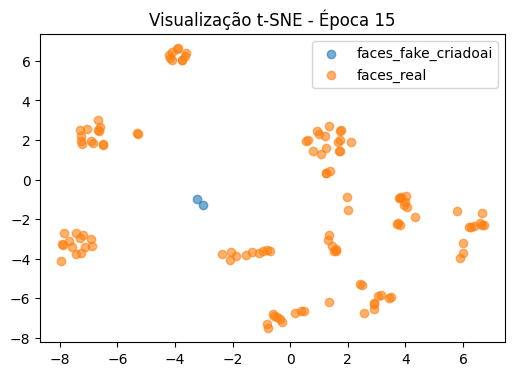

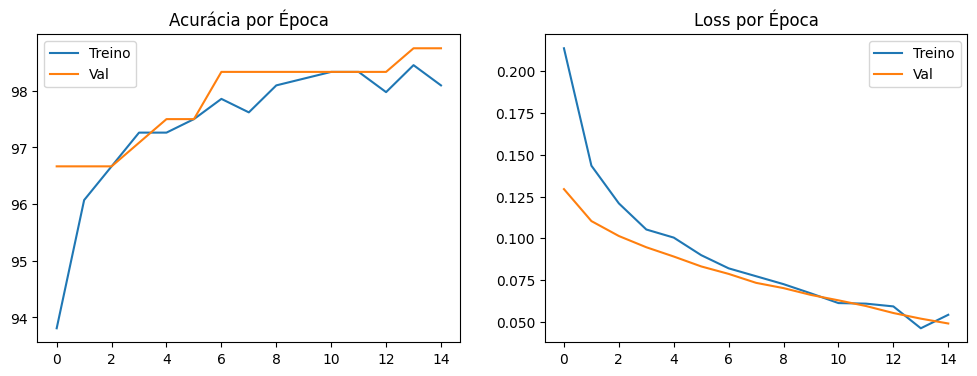

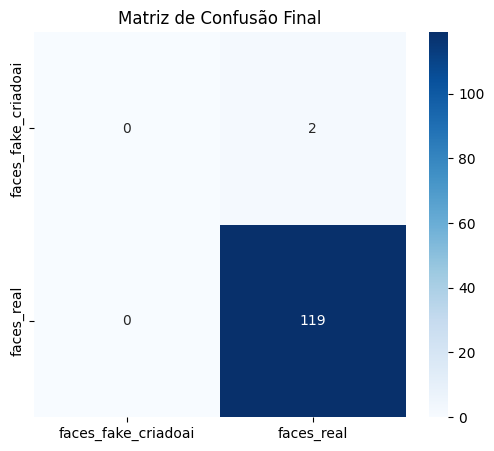


--- Relatório Final de Classificação ---
                     precision    recall  f1-score   support

faces_fake_criadoai       0.00      0.00      0.00         2
         faces_real       0.98      1.00      0.99       119

           accuracy                           0.98       121
          macro avg       0.49      0.50      0.50       121
       weighted avg       0.97      0.98      0.98       121



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, random_split, Dataset
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
import numpy as np

# =========================================================
# 1) LOADER OPENCV (EVITA ERRO DE METADADOS JPEG)
# =========================================================
def opencv_loader(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return Image.fromarray(img)

# =========================================================
# 2) WRAPPER DE LABELS (EVITA ERRO DE CUDA ASSERT)
# =========================================================
class BinaryDatasetWrapper(Dataset):
    def __init__(self, subset, class_to_idx):
        self.subset = subset
        self.class_to_idx = class_to_idx

    def __getitem__(self, index):
        img, old_label = self.subset[index]
        class_name = self.subset.dataset.classes[old_label]
        new_label = self.class_to_idx[class_name]
        return img, new_label

    def __len__(self):
        return len(self.subset)

# =========================================================
# 3) CONFIGURAÇÕES E DATASET (70/20/10)
# =========================================================
from google.colab import drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE_PATH = "/content/drive/MyDrive/dataset/real_fake"
WEIGHTS_PATH = "/content/drive/MyDrive/dinov2_real_vs_fake.pth"

# Definimos as pastas exatas das suas fotos
CLASSES_ALVO = ['faces_fake_criadoai', 'faces_real']
target_mapping = {name: i for i, name in enumerate(CLASSES_ALVO)}

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

# Carrega e filtra
full_dataset = datasets.ImageFolder(root=BASE_PATH, transform=transform, loader=opencv_loader)
indices = [i for i, (_, label) in enumerate(full_dataset.samples)
           if full_dataset.classes[label] in CLASSES_ALVO]

# Aplica o mapeamento para garantir labels 0 e 1
binary_ds = BinaryDatasetWrapper(Subset(full_dataset, indices), target_mapping)

# Split 70% Treino, 20% Validação, 10% Teste
train_size = int(0.7 * len(binary_ds))
val_size = int(0.2 * len(binary_ds))
test_size = len(binary_ds) - train_size - val_size

train_ds, val_ds, test_ds = random_split(binary_ds, [train_size, val_size, test_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

# =========================================================
# 4) MODELO DINOv2 E CARREGAMENTO DE PESOS
# =========================================================
print("📥 Carregando DINOv2...")
dinov2 = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14", pretrained=True).to(DEVICE)

class DinoClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(384, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )
    def forward(self, x):
        with torch.no_grad():
            features = dinov2.forward_features(x)["x_norm_clstoken"]
        return torch.sigmoid(self.classifier(features))

model = DinoClassifier().to(DEVICE)

if os.path.exists(WEIGHTS_PATH):
    model.load_state_dict(torch.load(WEIGHTS_PATH))
    print(f"✅ Pesos '{os.path.basename(WEIGHTS_PATH)}' carregados com sucesso!")

criterion = nn.BCELoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-5)

# =========================================================
# 5) FUNÇÃO T-SNE E LOOP DE TREINO (15 ÉPOCAS)
# =========================================================
history = {"t_loss": [], "t_acc": [], "v_loss": [], "v_acc": []}

def run_tsne(epoch):
    model.eval()
    feats, labs = [], []
    with torch.no_grad():
        for i, (imgs, l) in enumerate(test_loader):
            if i > 8: break
            f = dinov2.forward_features(imgs.to(DEVICE))["x_norm_clstoken"]
            feats.append(f.cpu().numpy()); labs.append(l.numpy())
    X = TSNE(n_components=2).fit_transform(np.concatenate(feats))
    y = np.concatenate(labs)
    plt.figure(figsize=(6, 4))
    for name, idx in target_mapping.items():
        plt.scatter(X[y==idx, 0], X[y==idx, 1], label=name, alpha=0.6)
    plt.title(f"Visualização t-SNE - Época {epoch}"); plt.legend(); plt.show()

print("\n🚀 Iniciando Treinamento e Avaliação...")
for epoch in range(1, 16):
    model.train()
    t_loss, t_corr = 0, 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(DEVICE), labels.float().unsqueeze(1).to(DEVICE)
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward(); optimizer.step()
        t_loss += loss.item() * imgs.size(0)
        t_corr += ((out > 0.5).float() == labels).sum().item()

    # Validação
    model.eval()
    v_loss, v_corr = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(DEVICE), labels.float().unsqueeze(1).to(DEVICE)
            out = model(imgs); loss = criterion(out, labels)
            v_loss += loss.item() * imgs.size(0)
            v_corr += ((out > 0.5).float() == labels).sum().item()

    # Métricas
    cur_t_acc = (t_corr/len(train_ds))*100
    cur_v_acc = (v_corr/len(val_ds))*100
    history["t_acc"].append(cur_t_acc); history["v_acc"].append(cur_v_acc)
    history["t_loss"].append(t_loss/len(train_ds)); history["v_loss"].append(v_loss/len(val_ds))

    print(f"Época {epoch:02d}/15 | T.Loss: {history['t_loss'][-1]:.4f} T.Acc: {cur_t_acc:.2f}% | V.Loss: {history['v_loss'][-1]:.4f} V.Acc: {cur_v_acc:.2f}%")

    if epoch % 5 == 0:
        run_tsne(epoch)

# =========================================================
# 6) GRÁFICOS FINAIS E MATRIZ
# =========================================================

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.plot(history["t_acc"], label="Treino"); plt.plot(history["v_acc"], label="Val"); plt.title("Acurácia por Época"); plt.legend()
plt.subplot(1, 2, 2); plt.plot(history["t_loss"], label="Treino"); plt.plot(history["v_loss"], label="Val"); plt.title("Loss por Época"); plt.legend()
plt.show()

# Teste Final e Matriz
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        out = (model(imgs.to(DEVICE)) > 0.5).cpu().numpy()
        y_true.extend(labels.numpy()); y_pred.extend(out)


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES_ALVO, yticklabels=CLASSES_ALVO)
plt.title("Matriz de Confusão Final")
plt.show()

print("\n--- Relatório Final de Classificação ---")
print(classification_report(y_true, y_pred, target_names=CLASSES_ALVO))